Deep Learning
=============

Assignment 1
------------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified /Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large.tar.gz
Found and verified /Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labeled A through J.

In [3]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large already present - Skipping extraction of /Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large.tar.gz.
['/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/A', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/B', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/C', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/D', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/E', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/F', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/G', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/H', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/I', '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIS

---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [4]:
from IPython.display import Image, display
import random

def showImage(dir):
    for folder in dir:
        img = random.choice(os.listdir(folder))
        display(Image(filename=os.path.join(folder,img)))

In [5]:
print('Train Images: ')
showImage(train_folders)

Train Images: 


In [6]:
print('Train Images: ')
showImage(test_folders)

Train Images: 


In [7]:
letters = [chr(ord('A') + i) for i in range(0,10) ]

In [8]:
letters

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [9]:
os.getcwd()

'/Users/nilesh.malpeddi/Documents/GoogleDeepLearning'

In [10]:
base_dir = os.getcwd() + "/notmnist/notMNIST_large/"
letters = [chr(ord('A')+i) for i in range(0,10)]
for letter in letters:
    letter_dir = base_dir + letter
    random_image = random.choice(os.listdir(letter_dir))
    display(Image(filename=letter_dir+'/'+random_image))
    print(letter)

A


B


C


D


E


F


G


H


I


J


In [11]:
display(Image(filename="/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_small/A/MDEtMDEtMDAudHRm.png"))

In [12]:
display(Image(filename="./notmnist/notMNIST_small/A/MDEtMDEtMDAudHRm.png"))

In [13]:
display(Image(filename="./notmnist/notMNIST_large/A/a2F6b28udHRm.png"))

Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [14]:
image_size = 28 # Pixel width and heigh
pixel_depth = 255.0 # Number of levels per pixel

def load_letter(folder, min_num_images):
    """Load the data for single letter label"""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),dtype=np.float32)
    print(folder)
    num_images=0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (imageio.imread(image_file).astype(float)-pixel_depth/2)/pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images,:,:] = image_data
            num_images=num_images+1
        except(IOError, ValueError) as e:
            print('Could not read: ', image_file, ':', e, '- it\'s ok, skipping.')
    dataset = dataset[0:num_images,:,:]
    if num_images<min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' % (num_images,min_num_images))
    
    print('Full dataset tensor: ',dataset.shape)
    print('dataset Mean: ',np.mean(dataset))
    print('dataset Standard Deviation: ',np.std(dataset))
    return dataset

In [15]:
# image_size = 28  # Pixel width and height.
# pixel_depth = 255.0  # Number of levels per pixel.

# def load_letter(folder, min_num_images):
#   """Load the data for a single letter label."""
#   image_files = os.listdir(folder)
#   dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
#                          dtype=np.float32)
#   print(folder)
#   num_images = 0
#   for image in image_files:
#     image_file = os.path.join(folder, image)
#     try:
#       image_data = (imageio.imread(image_file).astype(float) - 
#                     pixel_depth / 2) / pixel_depth
#       if image_data.shape != (image_size, image_size):
#         raise Exception('Unexpected image shape: %s' % str(image_data.shape))
#       dataset[num_images, :, :] = image_data
#       num_images = num_images + 1
#     except (IOError, ValueError) as e:
#       print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
#   dataset = dataset[0:num_images, :, :]
#   if num_images < min_num_images:
#     raise Exception('Many fewer images than expected: %d < %d' %
#                     (num_images, min_num_images))
    
#   print('Full dataset tensor:', dataset.shape)
#   print('Mean:', np.mean(dataset))
#   print('Standard deviation:', np.std(dataset))
#   return dataset
        
# def maybe_pickle(data_folders, min_num_images_per_class, force=False):
#   dataset_names = []
#   for folder in data_folders:
#     set_filename = folder + '.pickle'
#     dataset_names.append(set_filename)
#     if os.path.exists(set_filename) and not force:
#       # You may override by setting force=True.
#       print('%s already present - Skipping pickling.' % set_filename)
#     else:
#       print('Pickling %s.' % set_filename)
#       dataset = load_letter(folder, min_num_images_per_class)
#       try:
#         with open(set_filename, 'wb') as f:
#           pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
#       except Exception as e:
#         print('Unable to save data to', set_filename, ':', e)
  
#   return dataset_names

# train_datasets = maybe_pickle(train_folders, 45000)
# test_datasets = maybe_pickle(test_folders, 1800)

In [16]:
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder+'.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder,min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset,f,pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to ',set_filename, ':', e)
    return dataset_names

In [17]:
train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/A.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/B.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/C.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/D.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/E.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/F.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/G.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/H.pickle already present - Skipping pickling.
/Users/nilesh.malpeddi/D

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

In [18]:
print('size of training set ' + str(len(train_datasets)))
# print('size of label set ' + str(len(train_labels)))
print('size of image row ' + str(len(train_datasets[0])))
print('size of image col ' + str(len(train_datasets[0][0])))
# print('label values ' + str(set(train_labels)))

size of training set 10
size of image row 84
size of image col 1


In [64]:
train_datasets

['/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/A.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/B.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/C.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/D.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/E.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/F.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/G.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/H.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/I.pickle',
 '/Users/nilesh.malpeddi/Documents/GoogleDeepLearning/notmnist/notMNIST_large/J.pickle']

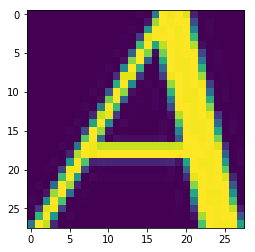

In [67]:
pickle_file = train_datasets[0] # Index 0 should be all A's, 1 = all B's etc
with open(pickle_file,'rb') as f:
    letter_set = pickle.load(f) # unpickle
    sample_idx = np.random.randint(len(letter_set)) # pick random image index
    sample_image = letter_set[sample_idx,:,:] # extract a 2D slice
    plt.figure()
    plt.imshow(sample_image)

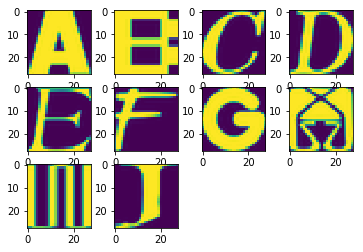

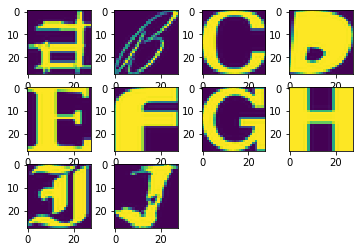

In [19]:
import random

def showPickledImage(dir):
    fig = plt.figure()
    for ids, folder in enumerate(dir):
        pkl_file = folder+".pickle"
        img = random.choice(pickle.load(open(pkl_file,"rb")))
        image = fig.add_subplot(3,4,ids+1)
        image.imshow(img)

showPickledImage(train_folders)
showPickledImage(test_folders)

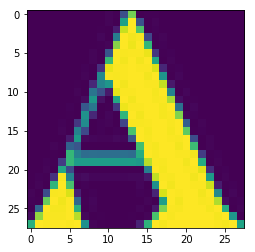

In [20]:
A_list = pickle.load(open("./notmnist/notMNIST_large/A.pickle", "rb"))
random_letter = random.choice(A_list)
%matplotlib inline
plt.imshow(random_letter)

In [21]:
# # you need a matplotlib inline to be able to show images in python notebook
# %matplotlib inline
# plt.imshow(train_datasets[10])
# plt.title("Char " + letter(train_labels[10]))

In [22]:
# exemplar = plt.imshow(train_dataset[0])
# train_labels[0]

In [23]:
# exemplar = plt.imshow(train_dataset[373])
# train_labels[373]

In [24]:
# exemplar = plt.imshow(test_dataset[18169])
# test_labels[18169]

---
Problem 3
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

In [25]:
from statistics import variance

letter_count = []
for pkl in train_datasets:
    letter = pickle.load(open(pkl,'rb'))
    letter_count.append(letter.shape[0])

print(letter_count)
print(variance(letter_count))

[52909, 52911, 52912, 52911, 52912, 52912, 52912, 52912, 52912, 52911]
0.9333333333333333


In [26]:
letters = [chr(ord('A')+i) for i in range(0,10)]
for letter in letters:
    letter_train_data = pickle.load(open('./notMNIST/notMNIST_large/'+letter+'.pickle', "rb"))
    print(letter+" train data count: "+str(len(letter_train_data)))
    letter_test_data = pickle.load(open('./notMNIST/notMNIST_small/'+letter+'.pickle', "rb"))
    print(letter+" test data count: "+str(len(letter_test_data)))

A train data count: 52909
A test data count: 1872
B train data count: 52911
B test data count: 1873
C train data count: 52912
C test data count: 1873
D train data count: 52911
D test data count: 1873
E train data count: 52912
E test data count: 1873
F train data count: 52912
F test data count: 1872
G train data count: 52912
G test data count: 1872
H train data count: 52912
H test data count: 1872
I train data count: 52912
I test data count: 1872
J train data count: 52911
J test data count: 1872


Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [27]:
def make_arrays(nb_rows,img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size),dtype=np.float32)
        labels = np.ndarray(nb_rows,dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels


In [28]:
def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file,'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v,:,:] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l,:,:]
                train_dataset[start_t:end_t,:,:] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise
    return valid_dataset, valid_labels, train_dataset, train_labels


In [29]:
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training: ', train_dataset.shape, train_labels.shape)
print('Validation: ', valid_dataset.shape, valid_labels.shape)
print('Testing: ', test_dataset.shape, test_labels.shape)

Training:  (200000, 28, 28) (200000,)
Validation:  (10000, 28, 28) (10000,)
Testing:  (10000, 28, 28) (10000,)


In [30]:
# train_size = 200000
# valid_size = 10000
# test_size = 10000

# valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
#   train_datasets, train_size, valid_size)
# _, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

# print('Training:', train_dataset.shape, train_labels.shape)
# print('Validation:', valid_dataset.shape, valid_labels.shape)
# print('Testing:', test_dataset.shape, test_labels.shape)

In [31]:
# def make_arrays(nb_rows, img_size):
#   if nb_rows:
#     dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
#     labels = np.ndarray(nb_rows, dtype=np.int32)
#   else:
#     dataset, labels = None, None
#   return dataset, labels

# def merge_datasets(pickle_files, train_size, valid_size=0):
#   num_classes = len(pickle_files)
#   valid_dataset, valid_labels = make_arrays(valid_size, image_size)
#   train_dataset, train_labels = make_arrays(train_size, image_size)
#   vsize_per_class = valid_size // num_classes
#   tsize_per_class = train_size // num_classes
    
#   start_v, start_t = 0, 0
#   end_v, end_t = vsize_per_class, tsize_per_class
#   end_l = vsize_per_class+tsize_per_class
#   for label, pickle_file in enumerate(pickle_files):       
#     try:
#       with open(pickle_file, 'rb') as f:
#         letter_set = pickle.load(f)
#         # let's shuffle the letters to have random validation and training set
#         np.random.shuffle(letter_set)
#         if valid_dataset is not None:
#           valid_letter = letter_set[:vsize_per_class, :, :]
#           valid_dataset[start_v:end_v, :, :] = valid_letter
#           valid_labels[start_v:end_v] = label
#           start_v += vsize_per_class
#           end_v += vsize_per_class
                    
#         train_letter = letter_set[vsize_per_class:end_l, :, :]
#         train_dataset[start_t:end_t, :, :] = train_letter
#         train_labels[start_t:end_t] = label
#         start_t += tsize_per_class
#         end_t += tsize_per_class
#     except Exception as e:
#       print('Unable to process data from', pickle_file, ':', e)
#       raise
    
#   return valid_dataset, valid_labels, train_dataset, train_labels
            
            
# train_size = 200000
# valid_size = 10000
# test_size = 10000

# valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
#   train_datasets, train_size, valid_size)
# _, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

# print('Training:', train_dataset.shape, train_labels.shape)
# print('Validation:', valid_dataset.shape, valid_labels.shape)
# print('Testing:', test_dataset.shape, test_labels.shape)

Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [32]:
# def randomize(dataset, labels):
#   permutation = np.random.permutation(labels.shape[0])
#   shuffled_dataset = dataset[permutation,:,:]
#   shuffled_labels = labels[permutation]
#   return shuffled_dataset, shuffled_labels
# train_dataset, train_labels = randomize(train_dataset, train_labels)
# test_dataset, test_labels = randomize(test_dataset, test_labels)
# valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [33]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

In [34]:
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Problem 4
---------
Convince yourself that the data is still good after shuffling!

---

In [69]:
np.bincount(train_labels)

array([20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000,
       20000])

In [36]:
np.bincount(test_labels)

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [37]:
np.bincount(valid_labels)

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

Finally, let's save the data for later reuse:

In [39]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [40]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [41]:
import hashlib
def count_duplicates(dataset1, dataset2):
    hashes = [hashlib.sha1(x).hexdigest() for x in dataset1]
    dup_indices = []
    for i in range(0, len(dataset2)):
        if hashlib.sha1(dataset2[i]).hexdigest() in hashes:
            dup_indices.append(i)
    return len(dup_indices)

In [42]:
all_data = pickle.load(open('./notMNIST/notMNIST.pickle', 'rb'))
print('Duplicates in Test and Validation Data: '+ str(count_duplicates(all_data['test_dataset'], all_data['valid_dataset'])))
print('Duplicates in Validation and Training Data: '+ str(count_duplicates(all_data['valid_dataset'], all_data['train_dataset'])))
print('Duplicates in Test and Validation Data: '+ str(count_duplicates(all_data['test_dataset'], all_data['train_dataset'])))

Duplicates in Test and Validation Data: 173
Duplicates in Validation and Training Data: 3500
Duplicates in Test and Validation Data: 3444


In [ ]:
# import hashlib
# all_data = pickle.load(open('./notMNIST/notMNIST.pickle', 'rb'))

# def count_duplicates(dataset1, dataset2):
#     hashes = [hashlib.sha1(x).hexdigest() for x in dataset1]
#     dup_indices = []
#     for i in range(0, len(dataset2)):
#         if hashlib.sha1(dataset2[i]).hexdigest() in hashes:
#             dup_indices.append(i)
#     return len(dup_indices)


# print('Duplicates in Test and Validation Data: '+ str(count_duplicates(all_data['test_dataset'], all_data['valid_dataset'])))
# print('Duplicates in Validation and Training Data: '+ str(count_duplicates(all_data['valid_dataset'], all_data['train_dataset'])))
# print('Duplicates in Test and Validation Data: '+ str(count_duplicates(all_data['test_dataset'], all_data['train_dataset'])))


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

In [ ]:
def get_score_LGR(train_dataset, train_labels, test_dataset, test_labels):
    classifier = LogisticRegression()
    train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
    test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
    classifier.fit(train_flatten_dataset, train_labels)
    return classifier.score([x.flatten() for x in test_dataset], test_labels)


In [ ]:
print("100 trainsamples score: " + str(get_score_LGR(train_dataset[:100], train_labels[:100], test_dataset, test_labels)))
print("1000 trainsamples score: " + str(get_score_LGR(train_dataset[:1000], train_labels[:1000], test_dataset, test_labels)))
print("5000 trainsamples score: " + str(get_score_LGR(train_dataset[:5000], train_labels[:5000], test_dataset, test_labels)))
print("10000 trainsamples score: " + str(get_score_LGR(train_dataset[:10000], train_labels[:10000], test_dataset, test_labels)))
#print("all trainsamples score: " + str(get_score_LGR(train_dataset, train_labels, test_dataset, test_labels)))

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

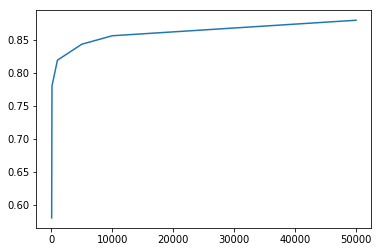

In [43]:
from sklearn.metrics import accuracy_score

samples, height, width = train_dataset.shape
X_train = np.reshape(train_dataset,(samples,height*width))
y_train = train_labels

samples, height, width = test_dataset.shape
X_test = np.reshape(test_dataset,(samples,height*width))
y_test = test_labels

train_size = [50,100,1000,5000,10000,50000]
samples = []
scores = []

clf = LogisticRegression()

for size in train_size:
    clf.fit(X_train[0:size],y_train[0:size])
    y_pred = clf.predict(X_test[0:size])
    samples.append(size)
    scores.append(accuracy_score(y_pred,y_test[0:size]))

plt.plot(samples, scores)

In [44]:
from sklearn.metrics import accuracy_score

def train(train_set, train_labels, test_set, test_labels, count):
    reg = LogisticRegression()
    train_flattened = np.reshape(train_set[:count], (count, train_set.shape[1] * train_set.shape[2]))
    reg.fit(train_flattened, train_labels[:count])
    test_flattened = np.reshape(test_set, (test_set.shape[0], 
                                                       test_set.shape[1] * test_set.shape[2]))
    prediction = reg.predict(test_flattened)
    return accuracy_score(test_labels, prediction)

In [45]:
train(train_dataset, train_labels, test_dataset, test_labels, 50)

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6424

In [46]:
train(train_dataset, train_labels, test_dataset, test_labels, 100)

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7236

In [47]:
train(train_dataset, train_labels, test_dataset, test_labels, 1000)

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8327

In [48]:
train(train_dataset, train_labels, test_dataset, test_labels, 5000)

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8481

In [49]:
train(train_dataset, train_labels, test_dataset, test_labels, 10000)

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.856

In [ ]:
#train(train_dataset, train_labels, test_dataset, test_labels, 50000)

In [51]:
flat_train_dataset_50 = [x.flatten() for x in train_dataset[:50]]
flat_train_dataset_100 = [x.flatten() for x in train_dataset[:100]]
flat_train_dataset_1000 = [x.flatten() for x in train_dataset[:1000]]
flat_train_dataset_5000 = [x.flatten() for x in train_dataset[:5000]]
flat_train_dataset_10000 = [x.flatten() for x in train_dataset[:10000]]
flat_train_dataset_50000 = [x.flatten() for x in train_dataset[:50000]]

In [52]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [53]:
model50 = lgr.fit(flat_train_dataset_50,train_labels[:50])
model100 = lgr.fit(flat_train_dataset_100,train_labels[:100])
model1000 = lgr.fit(flat_train_dataset_1000,train_labels[:1000])
model5000 = lgr.fit(flat_train_dataset_5000,train_labels[:5000])
model10000 = lgr.fit(flat_train_dataset_10000,train_labels[:10000])
model50000 = lgr.fit(flat_train_dataset_50000,train_labels[:50000])

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

In [54]:
from sklearn.model_selection import cross_val_score
score_50=cross_val_score(estimator = model50, X = flat_train_dataset_50, y = train_labels[:50], cv=5).mean()
score_100=cross_val_score(estimator = model100, X = flat_train_dataset_100, y = train_labels[:100], cv=5).mean()
score_1000=cross_val_score(estimator = model1000, X = flat_train_dataset_1000, y = train_labels[:1000], cv=5).mean()
score_5000=cross_val_score(estimator = model5000, X = flat_train_dataset_5000, y = train_labels[:5000], cv=5).mean()
score_10000=cross_val_score(estimator = model10000, X = flat_train_dataset_10000, y = train_labels[:10000], cv=5).mean()
score_50000=cross_val_score(estimator = model50000, X = flat_train_dataset_50000, y = train_labels[:50000], cv=5).mean()

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify 

/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nilesh.malpeddi/anaconda3/envs/mydeep/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", F

In [55]:
print('In 5 K-Fold Sample Cross Validation Scores')
print(score_50)
print(score_100)
print(score_1000)
print(score_5000)
print(score_10000)
print(score_50000)

In 5 K-Fold Sample Cross Validation Scores
0.6001587301587301
0.6338931106732965
0.7731694308081447
0.7743808296124318
0.7864952721514071
0.8122201036957074
